In [ ]:
# train, validation, test이미지 데이터셋 불러오기, 전처리
# Load and preprocess the train, validation, and test image datasets

from torchvision import datasets, transforms

# imagenet 표준 평균,표준편차
# imagenet standard mean. standard deviation
imagenet_mean = [0.485, 0.456, 0.406]
imagesnet_std = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagesnet_std)
])

val_test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagesnet_std)
])

train_dataset = datasets.Flowers102(
    root="content/flowers",
    split="train",
    download=True,
    transform=train_transform
)

val_dataset = datasets.Flowers102(
    root="content/flowers",
    split="val",
    download=True,
    transform=val_test_transform
)

test_dataset = datasets.Flowers102(
    root="content/flowers",
    split="test",
    download=True,
    transform=val_test_transform
)

print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))
print(len(train_dataset.classes))

100%|██████████| 345M/345M [00:16<00:00, 20.9MB/s]
100%|██████████| 502/502 [00:00<00:00, 2.20MB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 45.0MB/s]

1020
1020
6149
102


In [ ]:
# 각 데이터셋 dataloader 생성
# Create DataLoaders for each dataset

from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

In [ ]:
# 3개의 다른 사전학습 모델 생성
# resnet: 출력층 학습
# vgg: 특성맵추출층 일부 + 출력층 학습
# alexnet: 전체층 학습

# Create three different pretrained models
# ResNet: train only the output layer
# VGG: train part of the feature extractor and the output layer
# AlexNet: train all layers

from torchvision import models

resnet_model = models.resnet50(pretrained=True)
vgg_model = models.vgg16(pretrained=True)
alexnet_model = models.alexnet(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 215MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:06<00:00, 87.7MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 187MB/s]


In [ ]:
# 출력층 확인
# Check the output layer

resnet_model
# (fc): Linear(in_features=2048, out_features=1000, bias=True)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
vgg_model
# (classifier): Sequential(
#    (0): Linear(in_features=25088, out_features=4096, bias=True)
#    (1): ReLU(inplace=True)
#    (2): Dropout(p=0.5, inplace=False)
#    (3): Linear(in_features=4096, out_features=4096, bias=True)
#    (4): ReLU(inplace=True)
#    (5): Dropout(p=0.5, inplace=False)
#    (6): Linear(in_features=4096, out_features=1000, bias=True)
#  )

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
alexnet_model
# (classifier): Sequential(
#    (0): Dropout(p=0.5, inplace=False)
#    (1): Linear(in_features=9216, out_features=4096, bias=True)
#    (2): ReLU(inplace=True)
#    (3): Dropout(p=0.5, inplace=False)
#    (4): Linear(in_features=4096, out_features=4096, bias=True)
#    (5): ReLU(inplace=True)
#    (6): Linear(in_features=4096, out_features=1000, bias=True)
#  )

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# 출력층을 데이터에 맞게 교체
# Replace the classifier to fit the target dataset

import torch.nn as nn

resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 102)
vgg_model.classifier[6] = nn.Linear(4096, 102)
alexnet_model.classifier[6] = nn.Linear(4096, 102)

In [ ]:
# 각 모델 파라미터학습 범위 적용

for p in resnet_model.parameters():
  p.requires_grad = False
for p in resnet_model.fc.parameters():
  p.requires_grad = True

for p in vgg_model.parameters():
  p.requires_grad = False
for p in vgg_model.features[24:].parameters():
  p.requires_grad = True
for p in vgg_model.classifier[-1].parameters():
  p.requires_grad = True

for p in alexnet_model.parameters():
  p.requires_grad = True

In [ ]:
# 학습에 적용할 optimizer, criterion 생성
# Apply parameter training scope for each model

import torch

opt_resnet = torch.optim.Adam(resnet_model.fc.parameters(), lr=1e-3)
opt_vgg = torch.optim.Adam(filter(lambda p : p.requires_grad, vgg_model.parameters()), lr=1e-4)
opt_alexnet = torch.optim.Adam(alexnet_model.parameters(), lr=1e-4)

criterion = nn.CrossEntropyLoss()

In [ ]:
# 모델 학습
# Train model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet_model = resnet_model.to(device)
vgg_model = vgg_model.to(device)
alexnet_model = alexnet_model.to(device)

In [ ]:
# callback기능 클래스 구현
# Implement callback class

class EarlyStopping:
  def __init__(self, patience=3, delta=0.0, verbose=True, save_path="checkpoint.pt"):
    self.patience = patience
    self.delta = delta
    self.best_score = None
    self.counter = 0
    self.verbose = verbose
    self.early_stop = False
    self.save_path = save_path

  def __call__(self, val_acc, model):
    score = val_acc

    if self.best_score is None:
      self.best_score = score
      self.save_checkpoint(model)
      self.counter = 0
    elif score < self.best_score + self.delta:
      self.counter += 1
      if self.verbose:
        print(f"[EarlyStopping] no improvement ({self.counter}/{self.patience})")
      if self.counter >= self.patience:
        self.early_stop = True
    else:
      self.best_score = score
      self.save_checkpoint(model)
      self.counter = 0

  def save_checkpoint(self, model):
    torch.save(model.state_dict(), self.save_path)
    if self.verbose:
      print(f"[EarlyStopping] Saved best model to {self.save_path} (val_acc={self.best_score:.4f})")

In [ ]:
# 3개모델 학습함수
# Training function for the three models

import torch
import time

def train_model(model, dataloaders, criterion, optimizer, early_stopping, num_epochs=20, device = "cuda"):
  since = time.time()
  history = {
      "train_loss": [],
      "val_loss": [],
      "train_acc": [],
      "val_acc": []
  }

  for epoch in range(num_epochs):
    print(f"{epoch+1}/{num_epochs}")

    for phase in ["train", "val"]:
      if phase == "train":
        model.train()
      else:
        model.eval()

      running_loss = 0.0
      running_corrects = 0
      total = 0

      for inputs, labels in dataloaders[phase]:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        with torch.set_grad_enabled(phase == "train"):
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)

          if phase == "train":
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

      epoch_loss = running_loss / total
      epoch_acc = running_corrects.double() / total

      history[f"{phase}_loss"].append(epoch_loss)
      history[f"{phase}_acc"].append(epoch_acc.item())

      print(f"{phase.capitalize()} Loss: {epoch_loss:.4f}  Acc: {epoch_acc:.4f}")

      if phase == "val":
        early_stopping(epoch_acc.item(), model)

        if early_stopping.early_stop:
          print("Early stopping triggered!")
          break
    if early_stopping.early_stop:
      break
  model.load_state_dict(torch.load(early_stopping.save_path))

  time_elapsed = time.time() - since
  print(f"\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
  print(f"Best validation accuracy: {early_stopping.best_score:.4f}")

  return model, history

In [ ]:
early_stopping_resnet = EarlyStopping(patience=5, delta=0.001, save_path='best_model.pt')
early_stopping_vgg = EarlyStopping(patience=5, delta=0.001, save_path='best_model.pt')
early_stopping_alexnet = EarlyStopping(patience=5, delta=0.001, save_path='best_model.pt')

In [ ]:
dataloaders = {
    "train": train_loader,
    "val": val_loader
}

In [ ]:
# 학습실행
# Run training

best_resnet_model, resnet_history = train_model(resnet_model, dataloaders=dataloaders, criterion=criterion, optimizer=opt_resnet, early_stopping=early_stopping_resnet)
best_vgg_model, vgg_history = train_model(vgg_model, dataloaders=dataloaders, criterion=criterion, optimizer=opt_vgg, early_stopping=early_stopping_vgg)
best_alexnet_model, alexnet_history = train_model(alexnet_model, dataloaders=dataloaders, criterion=criterion, optimizer=opt_alexnet, early_stopping=early_stopping_alexnet)

1/20
Train Loss: 0.2848  Acc: 0.9539
Val Loss: 0.5547  Acc: 0.8637
[EarlyStopping] Saved best model to best_model.pt (val_acc=0.8637)
2/20
Train Loss: 0.2931  Acc: 0.9500
Val Loss: 0.6123  Acc: 0.8451
[EarlyStopping] no improvement (1/5)
3/20
Train Loss: 0.2658  Acc: 0.9529
Val Loss: 0.5770  Acc: 0.8559
[EarlyStopping] no improvement (2/5)
4/20
Train Loss: 0.3095  Acc: 0.9353
Val Loss: 0.6146  Acc: 0.8412
[EarlyStopping] no improvement (3/5)
5/20
Train Loss: 0.3052  Acc: 0.9441
Val Loss: 0.5639  Acc: 0.8627
[EarlyStopping] no improvement (4/5)
6/20
Train Loss: 0.2295  Acc: 0.9588
Val Loss: 0.5376  Acc: 0.8588
[EarlyStopping] no improvement (5/5)
Early stopping triggered!

Training complete in 1m 17s
Best validation accuracy: 0.8637
1/20
Train Loss: 0.3258  Acc: 0.9176
Val Loss: 0.5664  Acc: 0.8765
[EarlyStopping] Saved best model to best_model.pt (val_acc=0.8765)
2/20
Train Loss: 0.3399  Acc: 0.9000
Val Loss: 0.5849  Acc: 0.8657
[EarlyStopping] no improvement (1/5)
3/20
Train Loss: 0.2

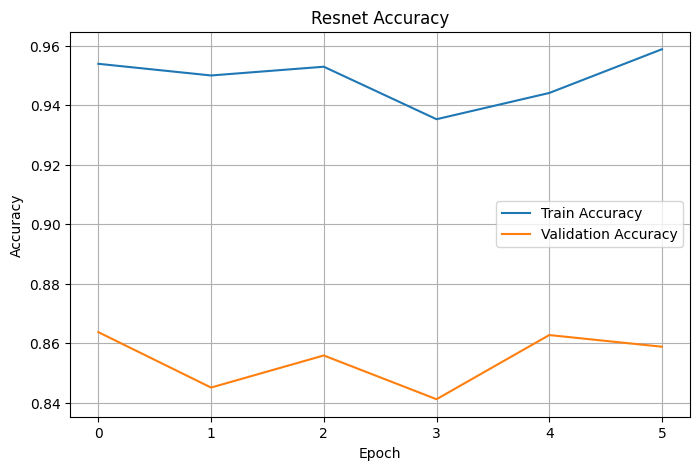

In [ ]:
# 학습 정확도 에포크별 시각화
# Visualize training accuracy by epoch

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(resnet_history['train_acc'], label="Train Accuracy")
plt.plot(resnet_history['val_acc'], label="Validation Accuracy")
plt.title("Resnet Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

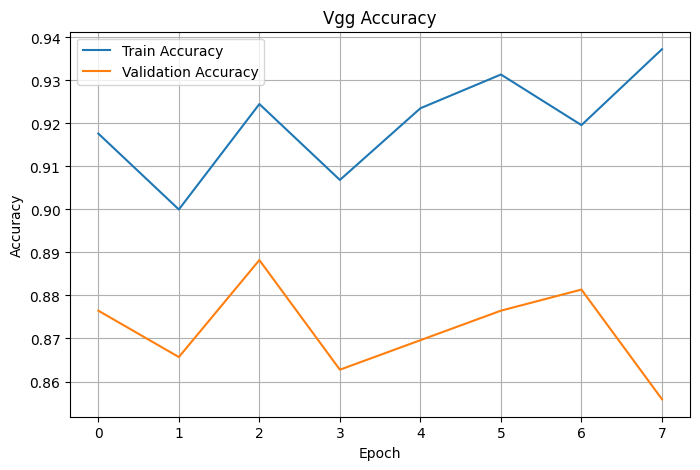

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(vgg_history['train_acc'], label="Train Accuracy")
plt.plot(vgg_history['val_acc'], label="Validation Accuracy")
plt.title("Vgg Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

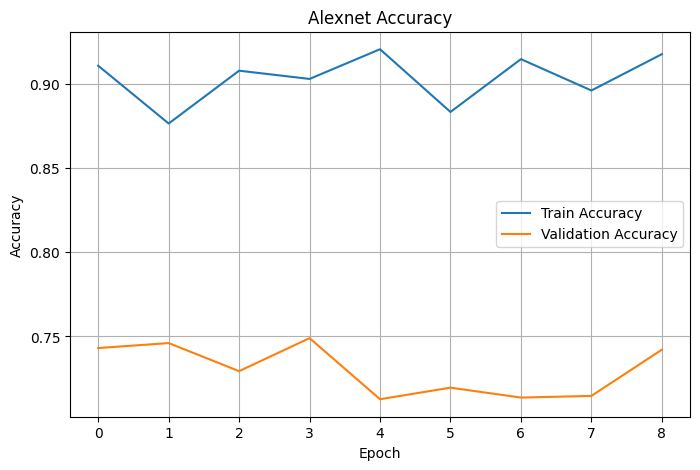

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(alexnet_history['train_acc'], label="Train Accuracy")
plt.plot(alexnet_history['val_acc'], label="Validation Accuracy")
plt.title("Alexnet Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 테스트 데이터로 실전 테스트 (아래 2가지 지표로 평가)
# Top-1: Accuracy 정확도 (클래스를 맞췄는지 여부)
# Top-5 Accuracy: 상위 5개 클래스 안에 정답이 포함될 확률

# Evaluate on the test set using the following two metrics:
# Top-1 Accuracy: whether the predicted class matches the true label
# Top-5 Accuracy: the probability that the true label is among the top 5 predicted classes

import torch
import torch.nn.functional as F

def evaluate_model(model, dataloader, device="cuda"):
  model.eval()
  correct_top1 = 0
  correct_top5 = 0
  total = 0

  with torch.no_grad():
    for inputs, labels in dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)

      _, preds_top1 = outputs.topk(1, dim=1)
      correct_top1 += torch.sum(preds_top1.squeeze() == labels).item()

      _, preds_top5 = outputs.topk(5, dim=1)
      for i in range(labels.size(0)):
        if labels[i] in preds_top5[i]:
          correct_top5 += 1

      total += labels.size(0)

  top1_acc = correct_top1 / total
  top5_acc = correct_top5 / total

  print(f"Top-1 Accuracy: {top1_acc:.4f}")
  print(f"Top-5 Accuracy: {top5_acc:.4f}")

  return top1_acc, top5_acc

In [ ]:
resnet_top1, resnet_top5 = evaluate_model(best_resnet_model, test_loader)
vgg_top1, vgg_top5 = evaluate_model(best_vgg_model, test_loader)
alexnet_top1, alexnet_top5 = evaluate_model(best_alexnet_model, test_loader)

Top-1 Accuracy: 0.8452
Top-5 Accuracy: 0.9582
Top-1 Accuracy: 0.8383
Top-5 Accuracy: 0.9554
Top-1 Accuracy: 0.7095
Top-5 Accuracy: 0.8927


In [ ]:
#   resnet_model:     [Top-1 Accuracy: 0.8452
#                      Top-5 Accuracy: 0.9582]

#   vgg_model:        [Top-1 Accuracy: 0.8383
#                      Top-5 Accuracy: 0.9554]

#   alexnet_model:    [Top-1 Accuracy: 0.7095
#                      Top-5 Accuracy: 0.8927]